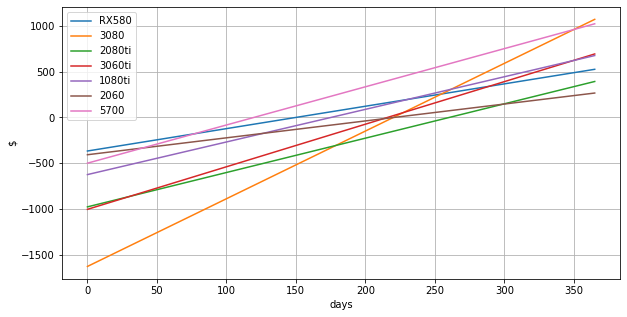

In [27]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import typing
%matplotlib inline

"""
If you want this notebook to be accurate, find the current pricecs of the GPU's 
and the current profittability rates. And update/add the current variables.
Values are valid for 2/26/2021, change daily manually. ETH is volatile so you should.
"""

#AED/USD conversion, use if you want
usd = lambda x: x/3.68
aed = lambda x: x*3.68


#GPU class
class GPU:
    def __init__(self, name: str,cost: float,daily_profit: float,fixed_cost: float,n: int):
        self.name = name
        self.cost = cost
        self.daily_profit = daily_profit
        self.fixed_cost = fixed_cost
        self.n = n

    def cashplot(self):
        if self.n != 1 or self.n != 0:
            self.cost = (self.cost*self.n)-(self.fixed_cost*(self.n-1))
            self.daily_profit = self.daily_profit*self.n


        cashsum_gpu = 0
        gpu_profit = [self.daily_profit for i in range(1,366)]
        gpu_cash = np.append([-self.cost],gpu_profit)

        summed_list = []
        for v in gpu_cash:
            cashsum_gpu += v
            summed_list.append(cashsum_gpu)

        return summed_list
    
    def breakeven(self):
        return self.cost//self.daily_profit
        

    def profit(self):
        return self.cashplot()[-1]


#GPU list
GPU_list = [
GPU('RX580',usd(1350),2.45,usd(500),1),
GPU('3080',usd(6000),7.41,usd(500),1),
GPU('2080ti',usd(3600),3.76,usd(500),1),
GPU('3060ti',usd(3700),4.66,usd(500),1),
GPU('1080ti',usd(2300),3.57,usd(500),1),
GPU('2060',usd(1500),1.85,usd(500),1),
GPU('5700',usd(1840),4.18,usd(500),1)
]

#plotting
days = range(0,366)
plt.rcParams['figure.figsize'] = [10, 5] 
for v in GPU_list:
    plt.plot(days, v.cashplot(), label=v.name)
plt.ylabel('$')
plt.xlabel('days')
plt.legend()
plt.grid()
plt.show()



In [32]:
#Df

gpu_list = [v.name for v in GPU_list]
daily_profit_list = [v.daily_profit for v in GPU_list]
cost_list = [v.cost for v in GPU_list]
annual_profit_list = [v.profit() for v in GPU_list]

d = {'GPU': gpu_list,
     'daily_profit': daily_profit_list,
     'cost': cost_list,
    'profit' : annual_profit_list,
    'value': [daily_profit/cost for daily_profit,cost in zip(daily_profit_list,cost_list)],
    'days_to_breakeven' : [v.breakeven() for v in GPU_list ]}
     

df = pd.DataFrame(data=d)

In [33]:
df

,GPU,daily_profit,cost,profit,value,days_to_breakeven
0,RX580,2.45,366.847826,527.402174,0.006679,149.0
1,3080,7.41,1630.434783,1074.215217,0.004545,220.0
2,2080ti,3.76,978.260870,394.139130,0.003844,260.0
3,3060ti,4.66,1005.434783,695.465217,0.004635,215.0
4,1080ti,3.57,625.000000,678.050000,0.005712,175.0
5,2060,1.85,407.608696,267.641304,0.004539,220.0
6,5700,4.18,500.000000,1025.700000,0.008360,119.0


In [34]:
def investment(gpu_annual_profit,rateofreturn):
    """
    Will return the amount of usd you would have needed to invest to get equivalent profits
    Pass profit(summedlist_gpuname) as gpu_annual_profit
    And pass the real rate of return on your investment in %
    """
    return (gpu_annual_profit)/(rateofreturn/100)

print(investment(GPU('RX580',usd(1350),2.45,usd(500),1).profit(),7)) #As you can see a 5700 will return equivalent to ~8000 USD in ETF's.

7534.316770186301
